## Experimenting with Pytorch Tensors
Tensors are optimized multidimensional arrays. This section of the Notebook is just me experimenting with them to gain a slightly deeper understanding of what they entail. A lot of what is in here are excerpts taken from Deep Learning with Pytorch by Eli Stevens et al.

In [ ]:
# A simple array.
a = [1.0,2.0,1.0]
a

In [ ]:
#Imports the pytorch library
import torch

In [ ]:
# Creates a tensor filled with 3 ones.
a = torch.ones(3)

In [ ]:
a

In [ ]:
#Element access works just like array access.
a[2]

In [ ]:
#Creates an assigns a tensor filled with 6 zeroes.
points = torch.zeros(6)

In [ ]:
points[0] = 4.0

In [ ]:
points[1] = 1.0

In [ ]:
points[2] = 5.0
points[3] = 3.0
points[4] = 2.0

In [ ]:
points = torch.tensor([4.0,1.0,5.0,2.0,1.0])
points

In [ ]:
float(points[0]),float(points[1])

In [ ]:
#An example of a multidimensional tensor.
torch.tensor([[
    [4.,1.],
    [5.,3.],
    [2.,1.]
]])

In [ ]:
#The dimensions of the tensor.
points.shape

In [ ]:
#Need to look into the torch randn function.
img_t = torch.randn(3,5,5)
img_t

In [ ]:
weights = torch.tensor([0.2126,0.7152,0.0722])

In [ ]:
batch_t = torch.randn(2,3,5,5)

In [ ]:
img_gray_naive = img_t.mean(-3)
batch_gray_naive = batch_t.mean(-3)
img_gray_naive.shape, batch_gray_naive.shape

## Grokking Deep Learning

### Basics of model fitting. 
Given two temperature readings. One known(Celsius) the other unknown how do we determine what scale the unknown readings are?

In [ ]:
t_c = [0.5,14.0,15.0,28.0,11.0,8.0,3.0,-4.0,6.0,13.0,21.0] #Celsius readings
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4] #Unknown scale.
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [ ]:
t_c.shape #Shape allows us to determine the dimensions of the tensor.

In [ ]:
t_u.shape

#### Let's visualize the data above

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data ={
    "t_c" : t_c,
    "t_u" : t_u
}
dataframe = pd.DataFrame(data)
dataframe 

In [ ]:
sns.relplot(data=dataframe,x="t_c",y='t_u')

## We can see that the two scales are linearly correlated. Meaning that they are different only in some weight(coefficient) and bias. Let's model this.

In [ ]:
#We define our model
def model(t_u,w,b): #inputs to our models are the weights, biases and the model we're trying fit.
    return w*t_u + b
    

In [ ]:
#We define our loss function
def loss(t_p,t_c):
    squared_diffs = (t_p-t_c)**2 #Squared mean error
    return squared_diffs.mean() #Takes the mean of all the tensors generated.

In [ ]:
w = torch.ones(())
b = torch.zeros(())

In [ ]:
t_p = model(t_c,w,b)

In [ ]:
t_p

In [ ]:
loss = loss(t_c,t_u)

In [ ]:
loss

### Gradient Descent.
It is a technique with which we can adjust our parameters to fit our models appropriately(towards a local minimum). The goal is to get the value of the loss function as low as possible.

In [ ]:
delta = 0.1 #The value we add or subtract to our parameters during training.

In [ ]:
def loss_fn(t_p,t_c):
    squared_diffs = (t_p - t_c)**2 #Mean squared error
    return squared_diffs.mean() 

In [ ]:
loss_rate_of_change_w = (loss_fn(model(t_u,w+delta,b),t_c)) - (loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)
#We calculate the rate of change of loss in the parameters as a way with which we can determine the direction we should descend towards.

In [ ]:
learning_rate =  1e-2 #The value with which we adjust our parameters.
w = w - learning_rate * loss_rate_of_change_w #Creating a new value for our weights.
#Adjusting the model's learning rate is called hyperparameter tuning. We are training/fitting the parameters.

In [ ]:
loss_rate_of_change_b = (loss_fn(model(t_u, w, b + delta), t_c) - loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)
b = b - learning_rate * loss_rate_of_change_b 
#Same as above

In [ ]:
def dloss_fn(t_p,t_c): # Derivative of our loss function.
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0) #Chain rule on our loss function.
    return dsq_diffs

In [ ]:
def dmodel_dw(t_u, w, b):
    return t_u #Derivative of our model with respect to the derivative our model weights.

In [ ]:
def dmodel_db(t_u, w, b):
    return 1.0 #Derivative of our model with respect to our derivative bias.

In [ ]:
def grad_fn(t_u, t_c, t_p, w, b): #Gradient descent function.
    dloss_dtp = dloss_fn(t_p, t_c) #Derivative of our loss function with respect to derivative of our predicted temp.
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b) #Derivative of our loss wrt derivative of the weights.
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b) #Derivative of our loss wrt to derivative of our bias.
    return torch.stack([dloss_dw.sum(), dloss_db.sum()]) #It basically assembles a tensor 

In [ ]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params #Sets the paremters
        t_p = model(t_u, w, b) #assigns the predicted model
        loss = loss_fn(t_p, t_c) #Returns the loss of the model(How close it is to the actual model)
        grad = grad_fn(t_u, t_c, t_p, w, b) #Returns the gradient to see the direction with which we should train our model.
        params = params - learning_rate * grad # Assigns new parameters based on gradient and learning rate.
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [ ]:
training_loop(
n_epochs = 100,
learning_rate = 1e-4,
params = torch.tensor([1.0, 0.0]),
t_u = t_u,
t_c = t_c)

In [ ]:
t_un = 0.1 * t_u #We normalize the values so they don't go way too out of bounds.

In [ ]:
params = training_loop(
n_epochs = 5000,
learning_rate = 1e-2,
params = torch.tensor([1.0, 0.0]),
t_u = t_un,
t_c = t_c)
params

In [ ]:
#Visualizing the model again
sns.relplot(x=t_p, y=t_c) #We see that we were closely able to fit our unknown model.
sns.relplot(x=t_u,y=t_p)

In [ ]:
t_c

In [ ]:
t_u

In [ ]:
t_p

## Autograd. 
A technique that automatically calculates the gradient of the parameters at each step.

In [ ]:
def model(t_u,w,b):
    return w*t_u + b

In [ ]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [ ]:
params = torch.tensor([1.0,0.0],requires_grad = True) #sets autogradient. Keeps/Accumulates gradients of tensors whenever calculated.

In [ ]:
params.grad is None #As of now we can see that the gradients for the 

In [ ]:
loss = loss_fn(model(t_u,*params),t_c)
loss

In [ ]:
loss.backward() #We use backprop to calculate the gradient.

In [ ]:
params.grad

In [ ]:
#Training epochs in loop
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1): #Loop based on number of epochs.
        
        if params.grad is not None: #If we have calculated the gradient at some point in time we set the gradient back to zero.
            params.grad.zero_()
        
        t_p = model(t_u, *params) #Set the tensors of the predicted temperatures
        loss = loss_fn(t_p, t_c) # Calculate the loss
        loss.backward() #Calculate the gradient of the loss.
        
        with torch.no_grad(): #Need to understand torch.no_grad
            params -= learning_rate * params.grad  #Adjust params
    if epoch % 500 == 0:
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [ ]:
training_loop(
n_epochs = 5000,
learning_rate = 1e-2,
params = torch.tensor([1.0, 0.0], requires_grad=True),
t_u = t_un,
t_c = t_c)

In [ ]:
import torch.optim as optim #Optimizer library. We can use it to access a bunch of gradient descent optimizers. 

In [ ]:
dir(optim) # A list of optimizers in the library.

In [ ]:
params = torch.tensor([1.0,0.0],requires_grad=True)

In [ ]:
learning_rate = 1e-5

In [ ]:
optimizer = optim.SGD([params], lr=learning_rate) #Here we make use of SGD(Stochastic Gradient Descent).

In [ ]:
t_p = model(t_u,*params)
loss = loss_fn(t_p,t_c)
optimizer.zero_grad()
loss.backward()

In [ ]:
optimizer.step()

In [ ]:
params

In [ ]:
#Training with optimizer like SGD
def training_loop(n_epochs,optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1): #Loop based on number of epochs.
        t_p = model(t_u, *params) #Set the tensors of the predicted temperatures
        loss = loss_fn(t_p, t_c) # Calculate the loss
        loss.backward() #Calculate the gradient of the loss.
        optimizer.step()

    if epoch % 500 == 0:
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)



In [ ]:
training_loop(
n_epochs = 5000,
optimizer = optimizer,
params = params, 
t_u = t_un,
t_c = t_c)

# The essence of deep learning

The essence of Deep learning is model fitting. We look at our data, look at discrepancies, select a model with various parameters, select an error metric/cost/loss function, then perform gradient descent multiple times over.

In pytorch the steps approximate to:
1. Explore the data
2. Select a model/architecture with its parameters.
3. Create a loss function
4. Perform gradient descent with backprop multiple times over(The training loop)

## Creating train/test and validation sets
To see how well our model is actually learning we split our datasets into two parts, validation and test set. The validation set has the sole purpose of seeing how well our model performs on data it isn't been trained on. If there's an increasing divergence between the validation and training sets, the model is overfitting. If both are stagnant, the model isn't learning. They need to steadily converge to ensure we are making progress and that the model is learning.

In [ ]:
n_samples = t_u.shape[0] #We check the number of values in our unknown scale.
n_val = int(0.2 * n_samples) # We take 20% of the values for use as our validation set.

shuffled_indices = torch.randperm(n_samples) #We create a tensor of 11 indexed values.
train_indices = shuffled_indices[:-n_val] #Use some of those indexes for our training set
val_indices = shuffled_indices[-n_val:] # Use some of those indexes for our validation set
train_indices, val_indices

In [ ]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u #Normalize the training set for the unknown scale
val_t_un = 0.1 * val_t_u#Normalize the validation set for the unknown scale.

In [ ]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
    train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params) #We model both the training and validation sets, applying a loss to both.
        train_loss = loss_fn(train_t_p, train_t_c)
        val_t_p = model(val_t_u, *params) 
        val_loss = loss_fn(val_t_p, val_t_c)
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
            f" Validation loss {val_loss.item():.4f}")
    return params

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)
    
training_loop(
n_epochs = 3000,
optimizer = optimizer,
params = params,
train_t_u = train_t_un,
val_t_u = val_t_un, 
train_t_c = train_t_c,
val_t_c = val_t_c)

## Assuming the model was w2 * t_u ** 2 + w1 * t_u + b instead? How would we adapt our program to fit this new definition?

In [ ]:
def newmodel(t_u,w2,w1,b):
    return w2 * t_u ** 2 + w1 * t_u + b

In [ ]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
    train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = newmodel(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        val_t_p = newmodel(val_t_u, *params) 
        val_loss = loss_fn(val_t_p, val_t_c)
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
            f" Validation loss {val_loss.item():.4f}")
    return params

## Pytorch nn module

In [3]:
import torch.nn as nn # The torch.nn library comes with "modules" that allows us to construct Neural Networks.
import torch 
import torch.optim as optim

In [6]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)
t_u.shape

torch.Size([11, 1])

In [7]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([3, 7, 5, 6, 2, 8, 1, 0, 4]), tensor([ 9, 10]))

In [14]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [15]:
import torch.nn as nn 
linear_model = nn.Linear(1,1) # Creating a linear layer with a single input and output.
linear_model(t_un_val)

tensor([[3.1926],
        [3.7467]], grad_fn=<AddmmBackward0>)

In [16]:
linear_model.weight

Parameter containing:
tensor([[0.6926]], requires_grad=True)

In [17]:
linear_model.bias

Parameter containing:
tensor([-0.9908], requires_grad=True)

In [18]:
x = torch.ones(1)
linear_model(x)

tensor([-0.2982], grad_fn=<AddBackward0>)

In [19]:
x = torch.ones(10,1)
linear_model(x)

tensor([[-0.2982],
        [-0.2982],
        [-0.2982],
        [-0.2982],
        [-0.2982],
        [-0.2982],
        [-0.2982],
        [-0.2982],
        [-0.2982],
        [-0.2982]], grad_fn=<AddmmBackward0>)

In [21]:
linear_model = nn.Linear(1,1)
optimizer = optim.SGD(linear_model.parameters(),lr=1e-2)

In [22]:
linear_model.parameters()

<generator object Module.parameters at 0x7f852b3a0660>

In [23]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.4394]], requires_grad=True),
 Parameter containing:
 tensor([0.7154], requires_grad=True)]

In [25]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val): 
    for epoch in range(1,n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train,t_c_train)
        
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val,t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        
        optimizer.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")
        

In [27]:
training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), # <1>
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 105.4662, Validation loss 195.6651
Epoch 1000, Training loss 3.4706, Validation loss 4.2661
Epoch 2000, Training loss 2.8082, Validation loss 3.6213
Epoch 3000, Training loss 2.7947, Validation loss 3.5617

Parameter containing:
tensor([[5.3301]], requires_grad=True)
Parameter containing:
tensor([-17.0570], requires_grad=True)


In [29]:
seq_model = nn.Sequential(
        nn.Linear(1,13),
        nn.Tanh(),
        nn.Linear(13,1),
) # This is how we create a sequential model.

seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [31]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [32]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [34]:
from collections import OrderedDict

seq_model = nn.Sequential(
OrderedDict([
     ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
])
)
seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [42]:
optimizer = optim.SGD(seq_model.parameters(),lr=1e-3)

training_loop(n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(), 
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 1.3072, Validation loss 8.4445
Epoch 1000, Training loss 1.3060, Validation loss 8.5026
Epoch 2000, Training loss 1.3049, Validation loss 8.5535
Epoch 3000, Training loss 1.3039, Validation loss 8.5969
Epoch 4000, Training loss 1.3030, Validation loss 8.6319
Epoch 5000, Training loss 1.3021, Validation loss 8.6572
output tensor([[16.6594],
        [22.9807]], grad_fn=<AddmmBackward0>)
answer tensor([[13.],
        [21.]])
hidden tensor([[ 6.0870e-03],
        [-4.5389e-05],
        [-2.7670e-03],
        [-7.3005e-03],
        [ 7.7684e-04],
        [-3.6477e-03],
        [-5.8668e-04],
        [ 2.4122e-03]])


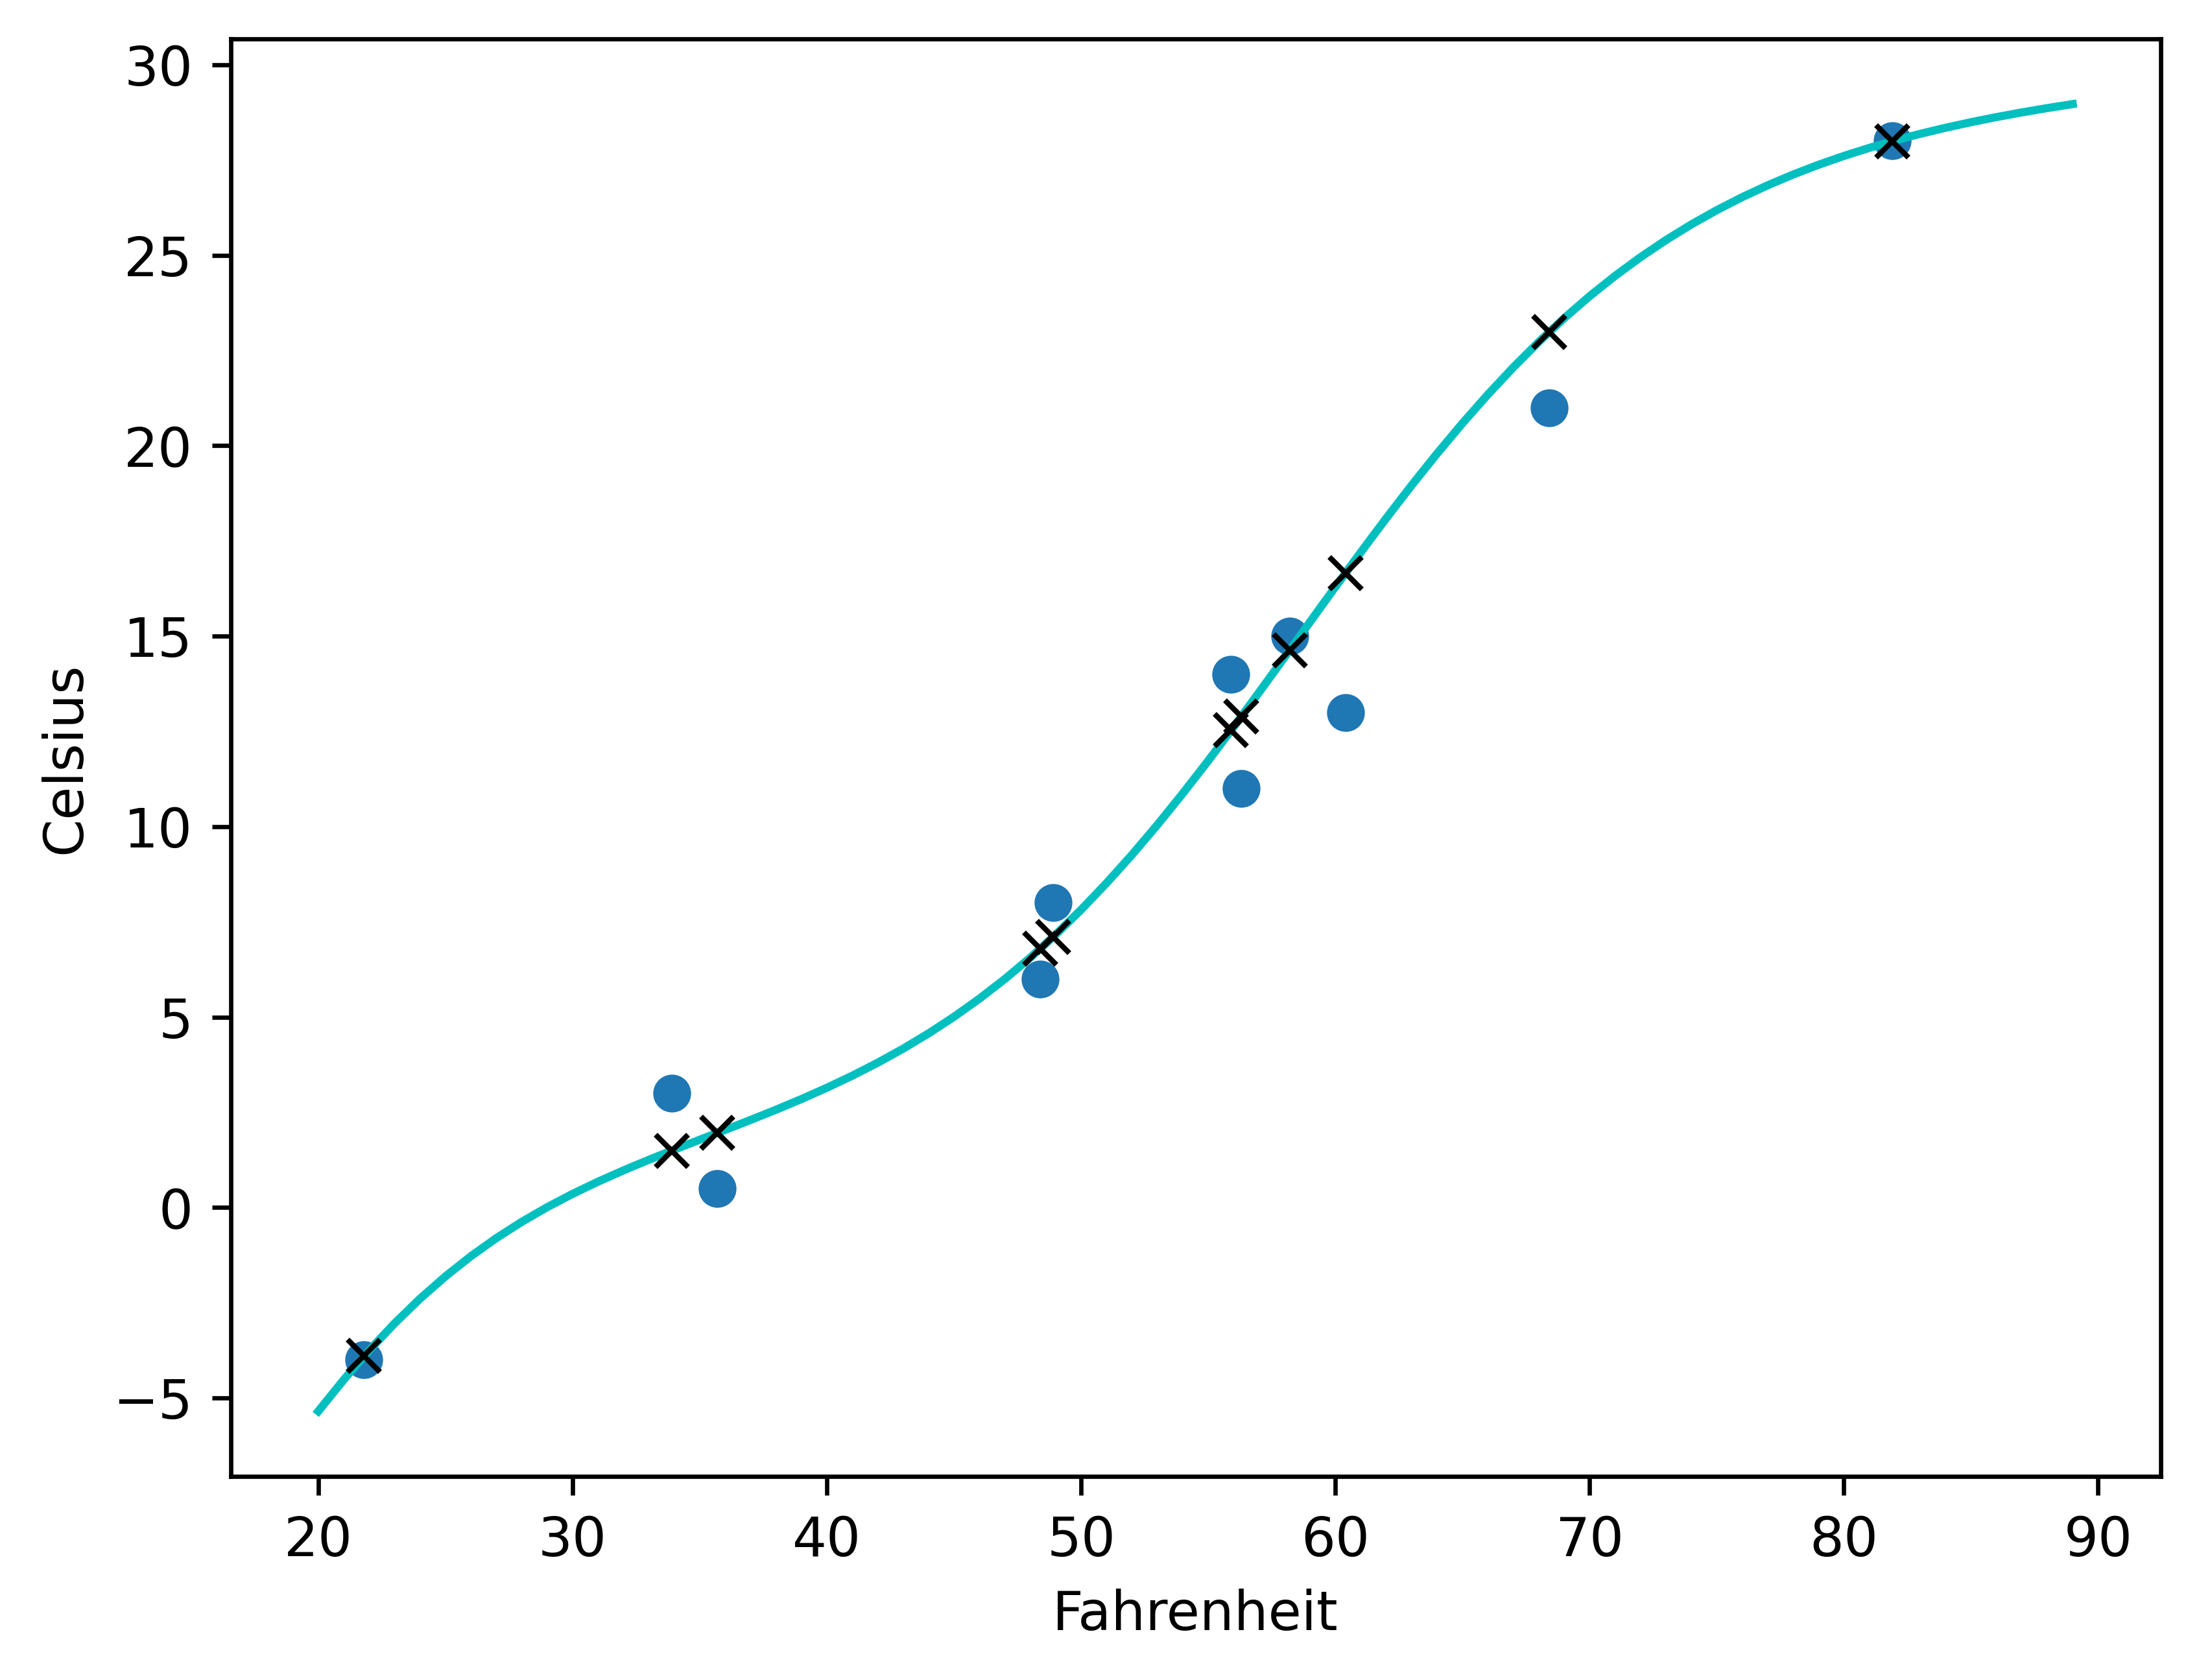

In [43]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')